In [1]:
show = True

### SafetyCarButton1-v0

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')
task = 'SafetyCarButton1-v0'

runs = ['SIM-only-bad','SIM-only-good','GAIL-only-good','GAIL-only-bad','GAIL-good-bad','SIM']
save_path = f'./figures/{task}'
constraint = 18
step_size = 50000

run_dirs = {
    'SIM'          :f'.\log_data\{task}\SIM',
    'GAIL-good-bad'                   :f'.\log_data\{task}\GAIL-good-bad',
    'SIM-only-good'             :f'.\log_data\{task}\\SIM-only-good',
    'SIM-only-bad'             :f'.\log_data\{task}\\SIM-only-bad',
    'GAIL-only-good'             :f'.\log_data\{task}\GAIL-only-good',
    'GAIL-only-bad'             :f'.\log_data\{task}\GAIL-only-bad',
}

num_seeds = {
    'SIM'          :6,
    'GAIL-good-bad'                   :4,
    'SIM-only-good'             :4,
    'SIM-only-bad'             :4,
    'GAIL-only-good'             :4,
    'GAIL-only-bad'             :4,
}




line_widths = {
    'SIM'      :4,
    'GAIL-good-bad'               :3,
    'SIM-only-good'         :3,
    'SIM-only-bad'         :3,
    'GAIL-only-good'         :3,
    'GAIL-only-bad'          :3,
}


run_colors = {
    'SIM'      :cmap.colors[3],
    'GAIL-good-bad'               :cmap.colors[2],
    'SIM-only-good'         :cmap.colors[0],
    'SIM-only-bad'         :cmap.colors[1],
    'GAIL-only-good'         :cmap.colors[4],
    'GAIL-only-bad'          :cmap.colors[5],
}
run_labels = {
    'GAIL-good-bad'               :'GAIL-good-bad',
    'SIM'      :'SIM (ours)',
    'SIM-only-good'         :'SIM-good',
    'SIM-only-bad'         :'SIM-bad',
    'GAIL-only-good'         :'GAIL-good',
    'GAIL-only-bad'          :'GAIL-bad',
}

run_lines = {
    'GAIL-good-bad'               :'-',
    'SIM'      :'-',
    'SIM-only-good'         :'-',
    'SIM-only-bad'         :'-',
    'GAIL-only-good'         :'-',
    'GAIL-only-bad'          :'-',
}


def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr

try:
    os.mkdir(save_path)
except OSError as error:
    print(error)   

[WinError 3] The system cannot find the path specified: './figures/SafetyCarButton1-v0'


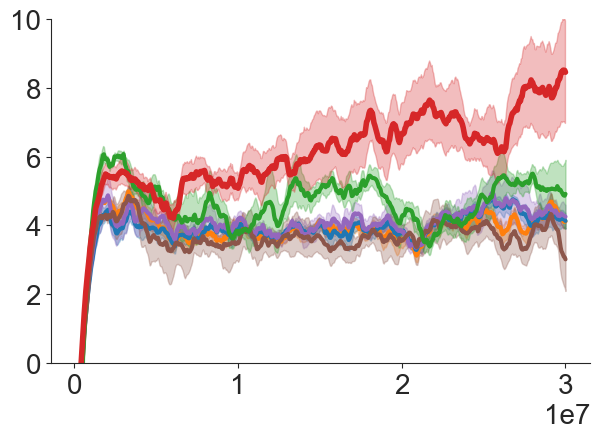

In [3]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    num_seed = num_seeds[run]
    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 10)) # set the ylim to bottom, top
plt.ylim(0, 10) # set the ylim to bottom, top

# plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'onlyGB_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

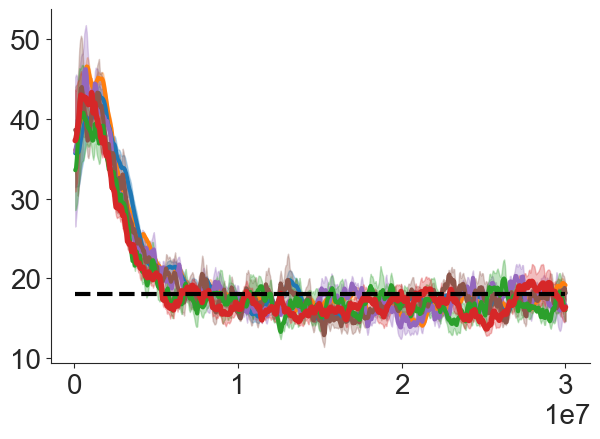

In [4]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []
    num_seed=num_seeds[run]
    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=3
, label='Constraint')
# plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'onlyGB_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

### SafetyCarPush1-v0

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')
task = 'SafetyCarPush1-v0'

runs = ['SIM-only-bad','SIM-only-good','GAIL-only-good','GAIL-only-bad','GAIL-good-bad','SIM']
save_path = f'./figures/{task}'
constraint = 18
step_size = 50000

run_dirs = {
    'SIM'          :f'.\log_data\{task}\SIM',
    'GAIL-good-bad'                   :f'.\log_data\{task}\GAIL-good-bad',
    'SIM-only-good'             :f'.\log_data\{task}\\SIM-only-good',
    'SIM-only-bad'             :f'.\log_data\{task}\\SIM-only-bad',
    'GAIL-only-good'             :f'.\log_data\{task}\GAIL-only-good',
    'GAIL-only-bad'             :f'.\log_data\{task}\GAIL-only-bad',
}

num_seeds = {
    'SIM'          :6,
    'GAIL-good-bad'                   :4,
    'SIM-only-good'             :4,
    'SIM-only-bad'             :4,
    'GAIL-only-good'             :4,
    'GAIL-only-bad'             :4,
}


run_colors = {
    'SIM'      :cmap.colors[3],
    'GAIL-good-bad'               :cmap.colors[2],
    'SIM-only-good'         :cmap.colors[0],
    'SIM-only-bad'         :cmap.colors[1],
    'GAIL-only-good'         :cmap.colors[4],
    'GAIL-only-bad'          :cmap.colors[5],
}


line_widths = {
    'SIM'      :4,
    'GAIL-good-bad'               :3,
    'SIM-only-good'         :3,
    'SIM-only-bad'         :3,
    'GAIL-only-good'         :3,
    'GAIL-only-bad'          :3,
}

run_labels = {
    'GAIL-good-bad'               :'GAIL-good-bad',
    'SIM'      :'SIM (ours)',
    'SIM-only-good'         :'SIM-good',
    'SIM-only-bad'         :'SIM-bad',
    'GAIL-only-good'         :'GAIL-good',
    'GAIL-only-bad'          :'GAIL-bad',
}

run_lines = {
    'GAIL-good-bad'               :'-',
    'SIM'      :'-',
    'SIM-only-good'         :'-',
    'SIM-only-bad'         :'-',
    'GAIL-only-good'         :'-',
    'GAIL-only-bad'          :'-',
}


def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr

try:
    os.mkdir(save_path)
except OSError as error:
    print(error)   

[WinError 3] The system cannot find the path specified: './figures/SafetyCarPush1-v0'


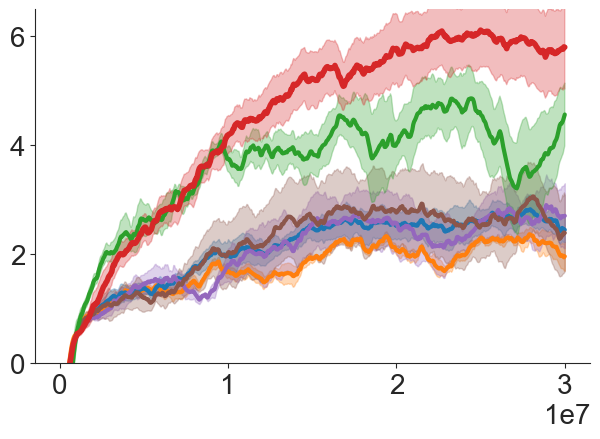

In [6]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    num_seed = num_seeds[run]
    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 6.5)) # set the ylim to bottom, top
plt.ylim(0, 6.5) # set the ylim to bottom, top

# plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'onlyGB_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

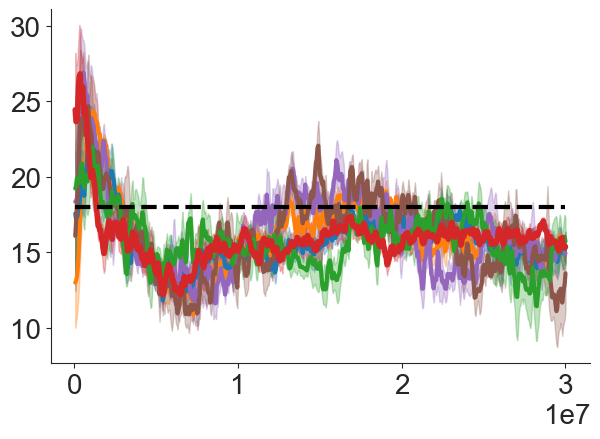

In [7]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []
    num_seed=num_seeds[run]
    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=3
, label='Constraint')
# plt.legend(loc='upper left')
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'onlyGB_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

In [8]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from matplotlib.lines import Line2D
# plt.clf()
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# SMALL_SIZE = 25
# mpl.rc('font', size=SMALL_SIZE)
# mpl.rc('axes', titlesize=SMALL_SIZE)
# sns.set_style('ticks')
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.right'] = False
# # Create an empty figure without any axes
# fig, ax = plt.subplots(figsize=(1, 1))  # Adjust the figsize as needed
# ax.axis('off')  # Turn off the axes to hide the plot table

# cmap = plt.get_cmap('tab10')
# # Define the legend labels and colors
# runs = ['GAIL-only-bad','SIM-only-bad','constraint','GAIL-only-good','SIM-only-good','GAIL-good-bad','SIM']

# run_colors = {
#     'SIM'      :cmap.colors[3],
#     'GAIL-good-bad'               :cmap.colors[2],
#     'SIM-only-good'         :cmap.colors[0],
#     'SIM-only-bad'         :cmap.colors[1],
#     'GAIL-only-good'         :cmap.colors[4],
#     'GAIL-only-bad'          :cmap.colors[5],
#     'constraint'            :'black',
# }
# run_labels = {
#     'GAIL-good-bad'               :'GAIL-good-bad',
#     'SIM'      :'SIM',
#     'SIM-only-good'         :'SIM-good',
#     'SIM-only-bad'         :'SIM-bad',
#     'GAIL-only-good'         :'GAIL-good',
#     'GAIL-only-bad'          :'GAIL-bad',
#     'constraint'            :'constraint',
# }

# run_linestyles = {
#     'GAIL-good-bad'               :'-',
#     'SIM'      :'-',
#     'SIM-only-good'         :'-',
#     'SIM-only-bad'         :'-',
#     'GAIL-only-good'         :'-',
#     'GAIL-only-bad'          :'-',
#     'constraint': '--',
# }


# # Create a custom legend with increased line length (handlelength)
# legend_elements = [Line2D([0], [0], color=run_colors[run], linestyle=run_linestyles[run],linewidth=5.0) for run in runs]
# ax.legend(legend_elements, [run_labels[run] for run in runs], ncol=3, handlelength=2)  # Adjust handlelength as desired

# # fig.update_layout(template='simple_white')
# # Save the figure as a pdf (or any other desired format) without any extra padding
# plt.savefig('only_GB_legend_bar.pdf', bbox_inches='tight', pad_inches=0, dpi=600)

# # Display the figure interactively (optional)
# # plt.show('svg')